# ## Some ideas for a numerical solution to the SPACE model: Stream Power with Alluvium Conservation and Entrainment

## Using a local analytical solution for H at each node at each time step

Basic equation set so far, for 1D. Sediment flux downstream:

$$\frac{dq_s}{dx} = K_s q S (1-\exp (-H/H_* ) ) + (1-F_f) K_r q S \exp (-H/H_*) -Vq_s/q$$

Rate of change of alluv thickness:

$$(1-\phi ) \frac{\partial H}{\partial t} = V q_s/q - K_s q S (1-\exp (-H/H_* ) )$$

Rate of change of rock elev:

$$\frac{\partial R}{\partial t} = U - K_r q S \exp (-H/H_* )$$

Local analytical solution for sediment flux within a cell:

$$q_s = \left( \frac{E_s+(1-F_f)E_r}{V/q} \right) \left( 1-\exp (-Vx/q) \right) + q_{s0} \exp (-Vx/q)$$

Try a little 1D version with some initial slope $S_0$:

In [34]:
import numpy as np
import matplotlib.pyplot as plt

num_nodes = 50
dx = 1.0
S0 = 0.01
V = 0.001 # settling velocity
Ff = 0.5
Ks = 0.1 # sed erodibility. not necessarily realistic
Kr = 0.0001
Hstar = 0.1 # sed thickness req'd for full entrainment potential. Not necessarily realistic.
dt = 1000.0 # seconds
total_time = 50000000.0
num_time_steps = int(total_time / dt)
U = 1.0e-7 # 1.0e-7 is still ~3m/year
r = 0.2 # some runoff factor

# array index
upper = np.arange(num_nodes-1)

# arrays
q = (np.arange(num_nodes) + 1)* dx * r # q = distance downstream * r
Voverq = V/q 
qs = np.zeros(num_nodes)
qs_in = np.zeros(num_nodes)
x = dx * np.arange(0, num_nodes)
H = np.zeros(num_nodes)
R = np.zeros(num_nodes)
z = (S0 * (num_nodes - 1) * dx - S0 * x)
R[:] = z

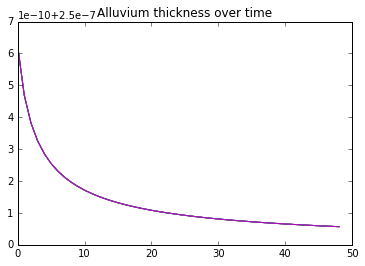

In [38]:
%matplotlib inline

for i in range(num_time_steps):
    # calculate slope
    S = (z[upper] - z[1:]) / dx
    
    # calculate Es and Er using H from previous time step?
    Es = Ks * q[upper] * S * (1.0 - np.exp(-H[upper] / Hstar))
    
    Er = Kr * q[upper] * S * np.exp(-H[upper] / Hstar)
    
    for j in range (num_nodes - 1):
        # calculate qs from H of previous time step
        qs[j] = (((Es[j]) + (1-Ff) * Er[j]) / Voverq[j]) * (1.0 - np.exp(-dx * Voverq[j])) + (qs_in[j] * np.exp(-dx * Voverq[j]))
        qs_in[j+1] = qs[j]
        
        # calculate H using the qs that was just found?
        # log is natural log
        H[j] = Hstar * np.log(((V * qs[j] * Kr)/(U * q[j] * Ks))+1)
        
    # not doing an analytical solution for R (?)    
    R[upper] += dt * (U - Kr * q[upper] * S * (np.exp(-H[upper] / Hstar)))
    
    if i % 10000 == 0:
        plt.plot(H[:-1])
        plt.title('Alluvium thickness over time')
    
    z = R + H


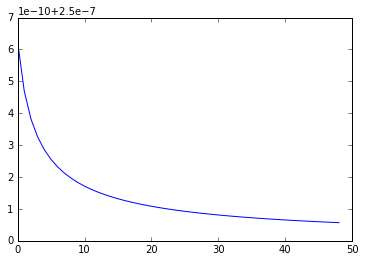

In [37]:
plt.plot(H[:-1])

In [35]:
num_time_steps

50000